# Activity 6.2 : Training Neural Networks


Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY**</u> | <u>**Activity 1.2**</u>
**Name** | Cuevas, Christian Jay L.
**Section** | CPE32S3
**Date Performed**: | 4/2/2024
**Date Submitted**: | 4/2/2024
**Instructor**: | Engr. Roman M. Richard  

<hr>

#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "https://raw.githubusercontent.com/ChristianJayCuevas/CPE-019---Emerging-Technologies-2/main/Hands-On%206.2/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
624,2,108,64,0,0,30.8,0.158,21,0
358,12,88,74,40,54,35.3,0.378,48,0
228,4,197,70,39,744,36.7,2.329,31,0
114,7,160,54,32,175,30.5,0.588,39,1
604,4,183,0,0,0,28.4,0.212,36,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

<hr>

**Observation**:
- This dataset has 8 features and 1 target variable. We have not done any correlational analysis and feature engineering, but we have normalized our dataset using StandardScaler. StandardScaler is very useful when scaling values with different range, it standardizes the weight of each variable. We have also split the dataset into training and testing, in a 75 - 25 split, the 75 is the training while the 25 is the testing dataset.

<hr>

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 14ms/step - loss: 0.7776 - accuracy: 0.3906 - val_loss: 0.7355 - val_accuracy: 0.4271
Epoch 2/200
18/18 [==============================] - 0s 6ms/step - loss: 0.7239 - accuracy: 0.4410 - val_loss: 0.6931 - val_accuracy: 0.4948
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6829 - accuracy: 0.5260 - val_loss: 0.6608 - val_accuracy: 0.6146
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6181 - val_loss: 0.6360 - val_accuracy: 0.6823
Epoch 5/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6266 - accuracy: 0.7066 - val_loss: 0.6168 - val_accuracy: 0.6979
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6070 - accuracy: 0.7188 - val_loss: 0.6017 - val_accuracy: 0.7135
Epoch 7/200
18/18 [==============================] - 0s 5ms/step - loss: 0.5912 - accuracy: 0.7222 - val_loss: 0.5894 - val_accuracy: 0.7344
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = np.argmax(model.predict(X_test_norm), axis=-1)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.43125084],
       [0.7969196 ],
       [0.24934165],
       [0.23118867],
       [0.1871227 ],
       [0.51122844],
       [0.0200354 ],
       [0.37328646],
       [0.89137256],
       [0.128482  ]], dtype=float32)

<hr>

**Observation**:
- In this first model, we only have 1 hidden layer with 12 nodes and we are using all the features as the input since our input shape is (8,). Our activation for our hidden layer is "relu" which stands for Rectified Linear Unit. The activation function for the output layer is "sigmoid" function. The next thing we did is to compile our model, we used SGD or Stochastic Gradient Descent with a learning rate of 0.003, our loss function is binary_crossentropy, and we are using the accuracy as metric. We then trained our model and we stored it in run_hist_1. In our model training, we used a validation dataset which is the testing dataset that we have splitted earlier (X_test_norm and y_test), our epoch is 200.

- Our final training accuracy is 0.7899 and the final training loss is 0.4311. In the validation accuracy, we have 0.7760 and the validation loss is 0.4978. Just by looking at the results, we can tell that this model is not overfitted since the value for the accuracy and loss of the training and the validation are pretty close to each other.

- Overall, these parameters for the model are quite optimized, the accuracy and loss are just stagnant which may mean a lot of things, like the need for feature selection and feature engineering.

<hr>

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.641
roc-auc is 0.819


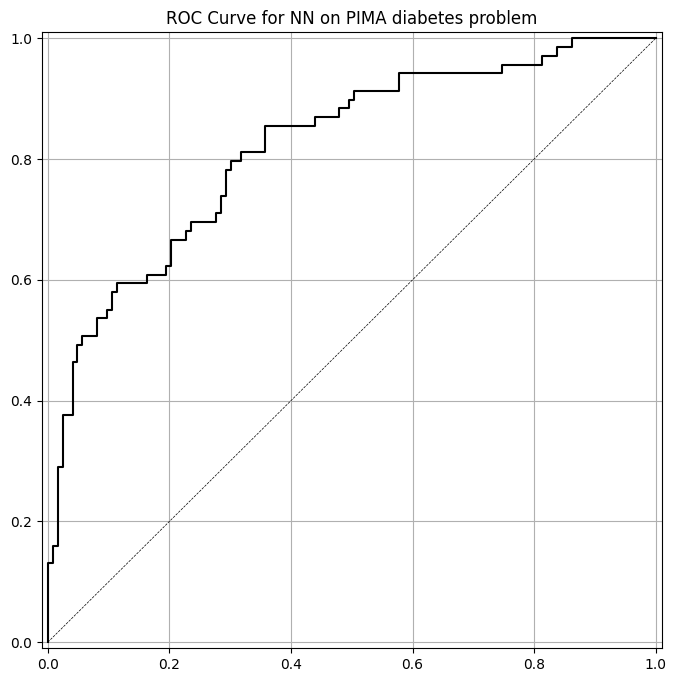

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

<hr>

**Observation**:
- We can observe above that our ROC curve has not reached the top left corner, which means that our model is not performing very well. This can also be seen in the accuracy of 0.641 and the ROC curve value has reached 0.819. We can also observe that our ROC curve looks like a stair and not a smooth curve, this means that our model is highly distinct and clustered.

<hr>

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

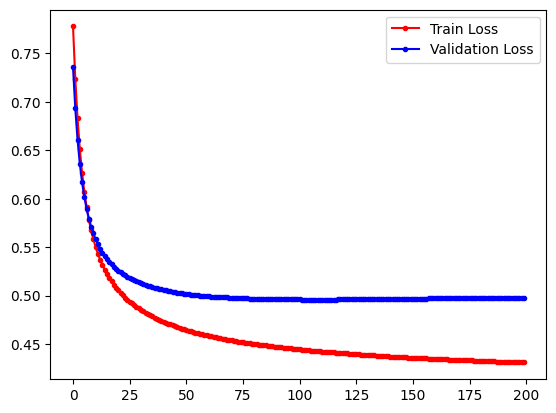

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

<hr>

**Answer**:
- We can see in the graph above that our train loss and validation loss are decreasing in the same pace but as they reached the 20th-25th iteration, the validation loss became stagnant until it reached the 200. The training loss still continued to decrease though, this represents that the model is overfitted because the training loss decreased but the validation loss stopped decreasing early.

<hr>

## Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

###Model with 2 hidden layers, with 6 nodes each

In [ ]:
model1  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 12ms/step - loss: 0.7940 - accuracy: 0.3056 - val_loss: 0.7713 - val_accuracy: 0.3490
Epoch 2/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7670 - accuracy: 0.3698 - val_loss: 0.7504 - val_accuracy: 0.3958
Epoch 3/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7468 - accuracy: 0.4080 - val_loss: 0.7344 - val_accuracy: 0.4375
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7306 - accuracy: 0.4583 - val_loss: 0.7214 - val_accuracy: 0.4896
Epoch 5/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7177 - accuracy: 0.5087 - val_loss: 0.7110 - val_accuracy: 0.5521
Epoch 6/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.7068 - accuracy: 0.5677 - val_loss: 0.7024 - val_accuracy: 0.5781
Epoch 7/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6976 - accuracy: 0.5885 - val_loss: 0.6949 - val_accuracy: 0.5781
Epoch

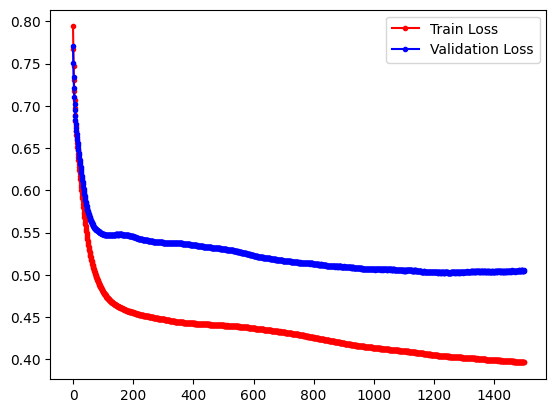

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [ ]:
y_pred_class_nn_2 = np.argmax(model1.predict(X_test_norm), axis=-1)
y_pred_prob_nn_2 = model1.predict(X_test_norm)

6/6 [==============================] - 0s 5ms/step


accuracy is 0.641
roc-auc is 0.823


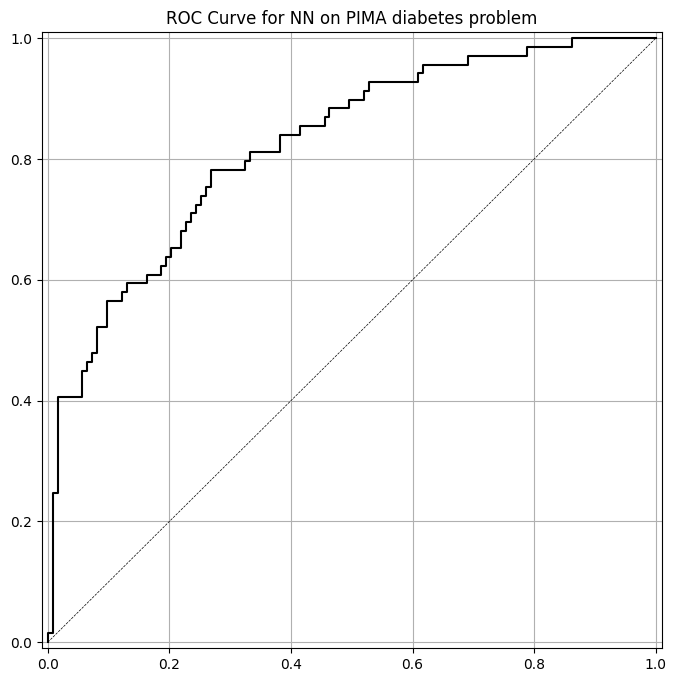

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

<hr>

**Observation**:
- In this supplementary exercise model 1, I am tasked to create a model with 2 hidden layers with 6 hidden nodes each. As you can see in the code above, I created 2 hidden layers with 6 nodes each and "relu" as the activation function. The output layer with 1 output node still stays the same. For the parameters of the compiled model, we still used SGD with the same learning rate but our number of epochs increase to 1500 from 200.

- Our final training accuracy for this model is 0.8090 and training loss of 0.3962. The validation accuracy for this model is 0.75 and validation loss of 0.5052. We can observe overfitting from the result of the model because the gap of the accuracy and loss is quite large.

- We can observe in the graph for the training loss and validation loss that as the validation approaches 0.50, it became stagnant regardless of the number of epoch.

- For our ROC curve, we can observe that it is much smoother than the previous ROC curve and it also has a higher value of 0.823. The accuracy remains the same, it is 0.641. This is because the dataset used for validation and training is the same.

<hr>

###Model with 2 hidden layers, with 5 and 3 hidden nodes respectively

In [ ]:
model2  = Sequential([
    Dense(5, input_shape=(8,), activation="relu"),
    Dense(3, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model2.compile(SGD(lr = .01), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=3000, batch_size = 32)

Streaming output truncated to the last 5000 lines.
18/18 [==============================] - 0s 5ms/step - loss: 0.4402 - accuracy: 0.7899 - val_loss: 0.5088 - val_accuracy: 0.7448
Epoch 502/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4400 - accuracy: 0.7899 - val_loss: 0.5090 - val_accuracy: 0.7448
Epoch 503/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4399 - accuracy: 0.7917 - val_loss: 0.5089 - val_accuracy: 0.7448
Epoch 504/3000
18/18 [==============================] - 0s 5ms/step - loss: 0.4398 - accuracy: 0.7899 - val_loss: 0.5088 - val_accuracy: 0.7448
Epoch 505/3000
18/18 [==============================] - 0s 5ms/step - loss: 0.4396 - accuracy: 0.7934 - val_loss: 0.5088 - val_accuracy: 0.7448
Epoch 506/3000
18/18 [==============================] - 0s 5ms/step - loss: 0.4397 - accuracy: 0.7899 - val_loss: 0.5088 - val_accuracy: 0.7448
Epoch 507/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4396 - accuracy: 0.789

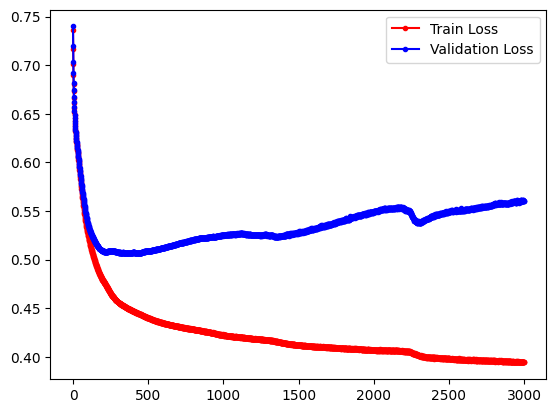

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [ ]:
y_pred_class_nn_3 = np.argmax(model2.predict(X_test_norm), axis=-1)
y_pred_prob_nn_3 = model2.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


accuracy is 0.641
roc-auc is 0.801


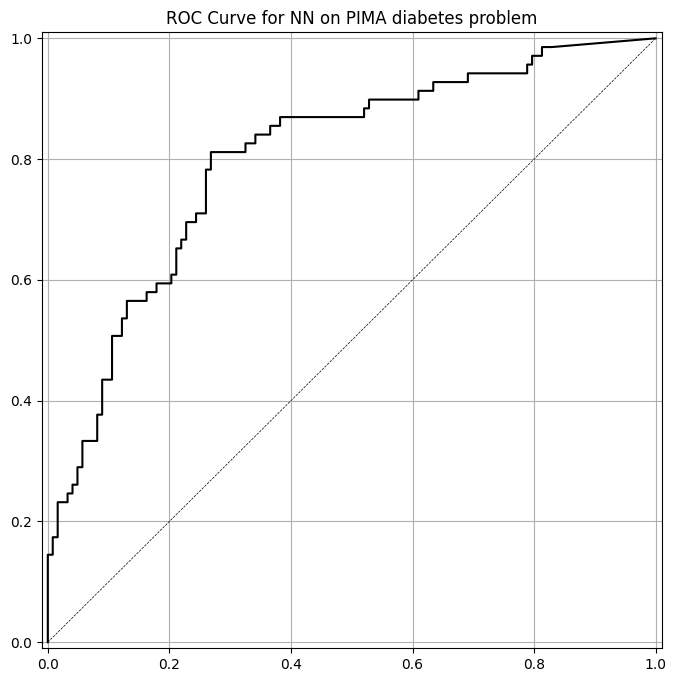

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_3)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_3)))

plot_roc(y_test, y_pred_prob_nn_3, 'NN')

<hr>

**Observation**:
- Here in this model, I used 2 hidden layers which is made up of 5 and 3 hidden layer nodes respectively. I used the rule of thumb where the hidden layer node should be 2/3 of the input layer node [1]. And that their value should be between the value of input layer node and output layer node. I still used the "relu" activation function here but I changed the learning rate to 0.01, the epochs to 3000 and the batch size to 32.

- The final training accuracy of this model is 0.8177 with the training loss of 0.3946. The final validation accuracy is 0.7344 with validation loss of 0.5603. This indicates overfitting since there is a large gap between the training accuracy and the validation accuracy.

- We can observe in the graph that our validation loss stopped decreasing  around 300th-500th epoch and instead started increasing until the last epoch.

- For our ROC curve, we can see that it is still not that smooth and haven't reached the top left corner, and the value even decreased to 0.801. This means that our model is less optimized in balancing the true positive and true negative values. The accuracy stays the same because the validation dataset and test dataset is the same.

<hr>

In [ ]:
model3  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(12, activation="relu"),
    Dense(1, activation="sigmoid")
])

model3.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_4 = model3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1000
18/18 [==============================] - 1s 23ms/step - loss: 0.6877 - accuracy: 0.6076 - val_loss: 0.6484 - val_accuracy: 0.6302
Epoch 2/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6734 - accuracy: 0.6354 - val_loss: 0.6378 - val_accuracy: 0.6510
Epoch 3/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6613 - accuracy: 0.6580 - val_loss: 0.6284 - val_accuracy: 0.6875
Epoch 4/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6736 - val_loss: 0.6200 - val_accuracy: 0.6979
Epoch 5/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6409 - accuracy: 0.6858 - val_loss: 0.6124 - val_accuracy: 0.7031
Epoch 6/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6322 - accuracy: 0.6944 - val_loss: 0.6053 - val_accuracy: 0.7240
Epoch 7/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6245 - accuracy: 0.6979 - val_loss: 0.5988 - val_accuracy: 0.7344
Epoch

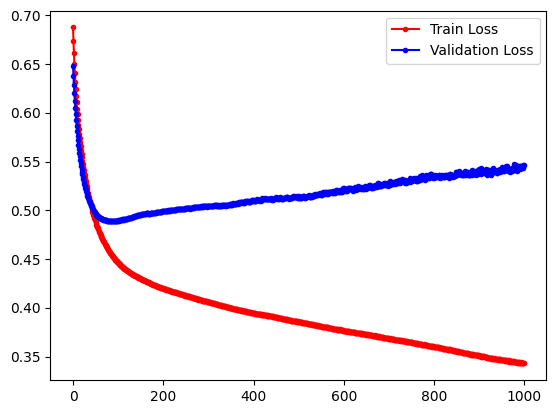

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_4.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_4.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [ ]:
y_pred_class_nn_4 = np.argmax(model3.predict(X_test_norm), axis=-1)
y_pred_prob_nn_4 = model3.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


accuracy is 0.641
roc-auc is 0.817


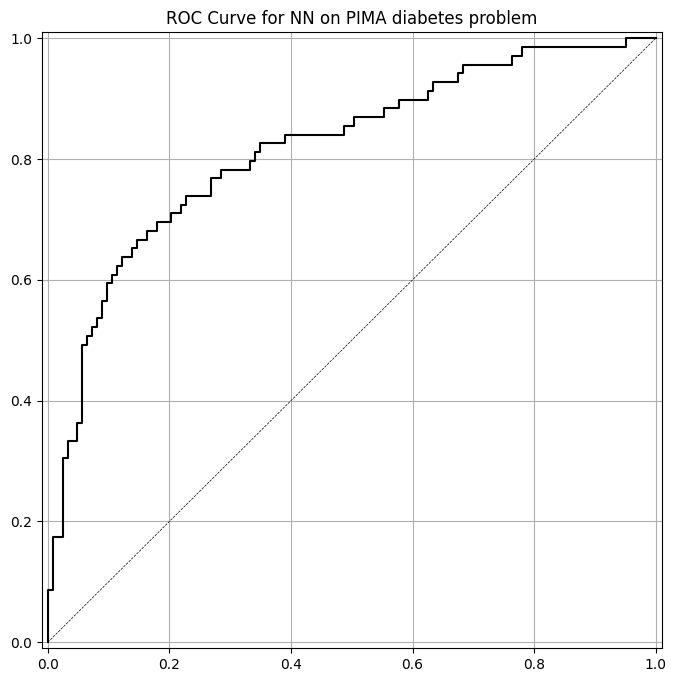

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_4)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_4)))

plot_roc(y_test, y_pred_prob_nn_4, 'NN')

<hr>

**Observation**:
- Here in this last model that I created, it is basically the same with our first model in this supplementary activity but the number of hidden layer nodes is doubled. In our first model, we have created 2 hidden layers with 6 hidden nodes each while this last model have 12 nodes each in the 2 hidden layers. The activation function is the same which is "relu". The learning rate is the same 0.003 but the number of epoch is increased from 200 to 1000.

- The final training accuracy is 0.8576 with the loss of 0.3437. The final validation accuracy is 0.7865 with the validation loss of 0.5465. This model also shows overfitting because of the large gap between the training and validation accuracy and loss.

- This model proves that the number of hidden layer nodes may not necessarily optimize the model to have a better accuracy, it also shows that the number of epoch may even be detrimental for the model because the loss may increase.

- For the ROC curve, it is pretty much the same with the previous ROC curve, it shows that our model balances the true positive and true negative predictions. The accuracy is still the same in 0.641 because of the same validation and testing dataset.

<hr>

#Summary/Conclusion

<hr>

### Summary:

- In this activity, I trained a neural network with a real world dataset. In this activity there are no feature selection or correlation but there is data normalization which is done with the StandardScaler(). The dataset is split to 75-25, 75 for the training dataset and 25 for the testing dataset. In the first model in the procedure, we created a model with 1 hidden layer and 12 hidden layer nodes. The learning rate is 0.003 for the SGD, we used binary crossentropy for the loss function and we used accuracy as the metric. For the training of the model, we used the testing dataset for the validation dataset and we have set it to 200 epoch. The result can be considered as acceptable and the model is not overfitted.

- For the supplementary activity, I created 3 models with different hidden layer nodes, learning rate, and epochs. I explored the different factors that affect the neural network. For the first model in the supplementary activity, I have set 2 hidden layers with 6 nodes each and the learning rate is 0.003, and the epochs is 1500. The result is also acceptable but the increase in terms of accuracy is not obvious and there is also a minimal increase in the ROC curve. The final results of training accuracy and loss also indicates overfitting. For the second model, I used the formula 2/3 of the previous layer for the hidden layer nodes, that's why I created a model with 2 hidden layer nodes with 5 and 3 nodes each. The activation function is still relu. The SGD learning rate is 0.01 and the epoch is 3000. The result is much worse than the previous models and shows that even if it is the rule of thumb, it may not be the best neural architecture. Also it shows that higher number of epochs may result to overfitting. For the last model, I doubled the hidden layer nodes of the first model, from 6 it became 12. The SGD learning rate is the same with the first model and the number of epoch is also the same. The result is not much better than the first model and it can be even considered as much less optimized. Also the model indicates overfitting. This shows that the number of hidden layer nodes may not be directly proportional for this particular dataset. Also the number of epochs may increase overfitting.

<hr>



### Conclusion:

- In this activity, I explored the world of neural networks using a real-world dataset. Without any prior feature selection or correlation analysis, I began by normalizing the data using the StandardScaler method. Splitting the dataset into a 75-25 ratio for training and testing respectively, I proceeded to build my first model with a single hidden layer comprising 12 nodes. Using a learning rate of 0.003 for the Stochastic Gradient Descent (SGD) optimizer, I utilized binary crossentropy as the loss function and accuracy as the evaluation metric. After 200 epochs, the model's performance proved acceptable without signs of overfitting. In the supplementary activity, I experimented with three additional models, each varying in hidden layer nodes, learning rate, and epochs. Despite adjusting parameters, the results differed widely. For instance, the second model, following the rule of thumb with 2/3 of the previous layer's nodes, exhibited poorer performance with increased epochs and a higher learning rate. Similarly, doubling the hidden layer nodes in the third model did not significantly improve results and suggested signs of overfitting. These outcomes highlights relationship between hidden layer nodes, epochs, and model performance, emphasizing the importance of careful parameter selection tailored to specific datasets to avoid overfitting and achieve optimal performance. Overall, this activity helped me widen my view regarding the neural networks and it made me understand that creating your own neural network is a very complicated task. I will certainly recommend this activity to the future data science students as it highlighted the important factors in creating a neural network. It also showcased the power of neural network using a real-world datset.


<hr>

###References:

[1]S. Karsoliya, “Approximating Number of Hidden layer neurons in Multiple Hidden Layer BPNN Architecture,” 2012. Accessed: Mar. 24, 2024. [Online]. Available: https://ijettjournal.org/volume-3/issue-6/IJETT-V3I6P206.pdf